In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.preprocessing import LabelEncoder 
from sklearn import tree
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# 1 - Business Problem
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

# 2 - Data collection and description

In [2]:
df = pd.read_csv("D:\\Harsha\\Data sciences\\Assignments\\Assignment_14_Decision Trees\\Fraud_check.csv")

In [3]:
data = df.copy()

In [4]:
data.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [5]:
data.tail(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
590,NO,Married,43018,85195,14,YES
591,YES,Single,27394,132859,18,YES
592,YES,Single,68152,75143,16,NO
593,NO,Divorced,84775,131963,10,YES
594,NO,Married,47364,97526,9,YES
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [6]:
data.shape

(600, 6)

In [7]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [10]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [12]:
data['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


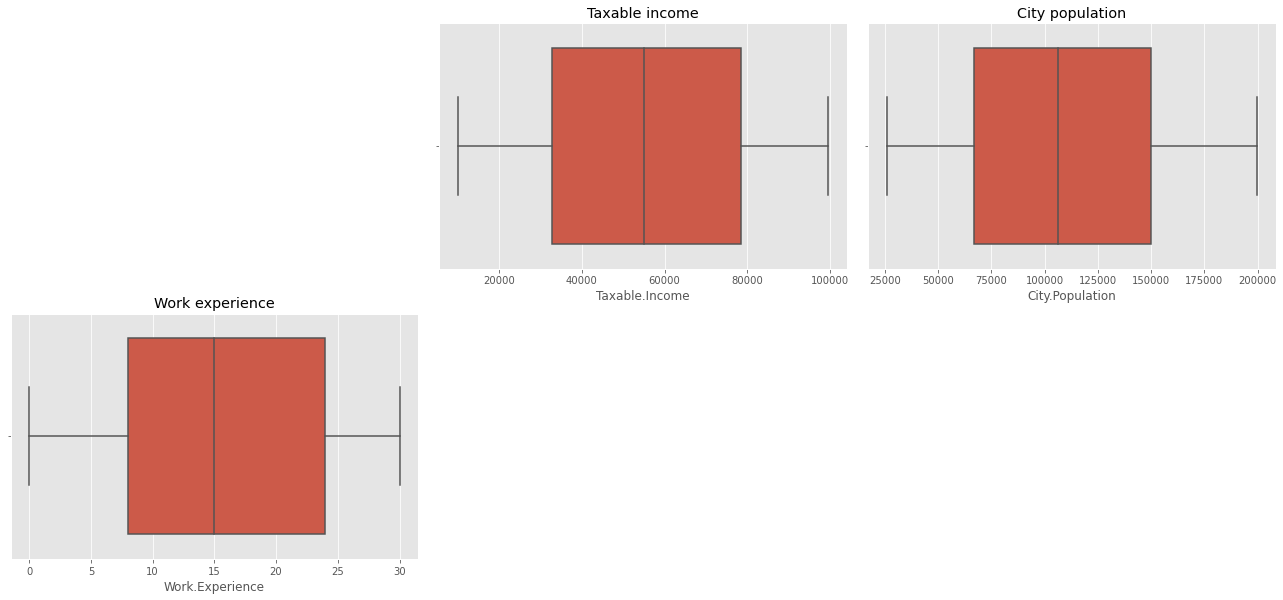

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(18,12))

plt.subplot(3,3,2)
sns.boxplot(data['Taxable.Income'])
plt.title('Taxable income')

plt.subplot(3,3,3)
sns.boxplot(data['City.Population'])
plt.title('City population')

plt.subplot(3,3,4)
sns.boxplot(data['Work.Experience'])
plt.title('Work experience')

plt.tight_layout()

### As we can see in above graphs no outliers are forund.

# 3 - Decision Tree - Model

#### Here we adding new column 'Income' for treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [14]:
data['income'] = '30000'

In [15]:
data.loc[data['Taxable.Income'] > 30000 , 'income'] = "Good"
data.loc[data['Taxable.Income'] <= 30000 , 'income'] = "Risky" 
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [16]:
data.drop('Taxable.Income' , axis =1 , inplace= True)
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [17]:
data['income'].value_counts()

Good     476
Risky    124
Name: income, dtype: int64

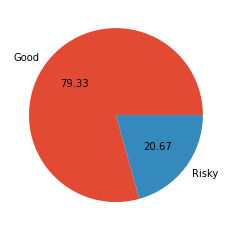

In [18]:
plt.pie(data['income'].value_counts() , labels= ['Good' , 'Risky'] , autopct='%0.2f')
plt.show()

In [19]:
label_en = LabelEncoder()
for i in range(0 , data.shape[1]):
    if data.dtypes[i] == 'object':
        data[data.columns[i]] = label_en.fit_transform(data[data.columns[i]])

In [20]:
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [21]:
x = data.drop('income' , axis = 1)
y = data['income']

### 3.1 - Model Building

In [22]:
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.2)

In [23]:
model = DecisionTreeClassifier(random_state= 40)
criterion = ['gini', 'entropy']
max_depth= range (0,12)
params_grid = [{'criterion' : criterion , 'max_depth' : max_depth}]
grid = GridSearchCV(estimator = model , param_grid = params_grid)
grid.fit(x_train , y_train)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\harsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\harsh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\harsh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    check_scalar(
  File "C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py", lin

GridSearchCV(estimator=DecisionTreeClassifier(random_state=40),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(0, 12)}])

In [24]:
print('Best params:' , grid.best_params_)
print('Best score:' , grid.best_score_)

Best params: {'criterion': 'entropy', 'max_depth': 1}
Best score: 0.7958333333333333


### 3.2 - Model evaluation on trained data

In [25]:
final_model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 1 , random_state= 40)
final_model.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=40)

In [26]:
y_train_pred = final_model.predict(x_train)
accuracy_score(y_train ,y_train_pred)

0.7958333333333333

In [27]:
confusion_matrix(y_train , y_train_pred)

array([[382,   0],
       [ 98,   0]], dtype=int64)

In [28]:
print(classification_report(y_train , y_train_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       382
           1       0.00      0.00      0.00        98

    accuracy                           0.80       480
   macro avg       0.40      0.50      0.44       480
weighted avg       0.63      0.80      0.71       480



C:\Users\harsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 79% accuracy and 0% recall on the test data. That’s a huge difference!

#### Model prediction is highly biased, to handle the imabalanced data, will be using SMOTE technique.

### 3.3 - Handling imbalanced trained data using SMOTE

In [30]:
sm = SMOTE(random_state = 40)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [31]:
print('x_train after resampling shape : ' , x_train_res.shape)
print('y_train after resampling shape : ' , y_train_res.shape)
print(y_train_res.value_counts())

x_train after resampling shape :  (764, 5)
y_train after resampling shape :  (764,)
0    382
1    382
Name: income, dtype: int64


In [32]:
print(y_test.value_counts())

0    94
1    26
Name: income, dtype: int64


### 3.4 - Building Decision Tree Classifier Model with balanced train data

In [33]:
model = DecisionTreeClassifier(random_state=40)
criterion = ['entropy', 'gini']
max_depth = range(1,10)
params = [{'criterion': criterion , 'max_depth':max_depth}]
grid = GridSearchCV(estimator=model, param_grid=params, cv = 10)
grid.fit(x_train_res, y_train_res)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=40),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': range(1, 10)}])

In [34]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 9}
0.6679425837320575


In [35]:
model_final= DecisionTreeClassifier(criterion='gini', max_depth=9, random_state=40)
model_final.fit(x_train_res, y_train_res)

DecisionTreeClassifier(max_depth=9, random_state=40)

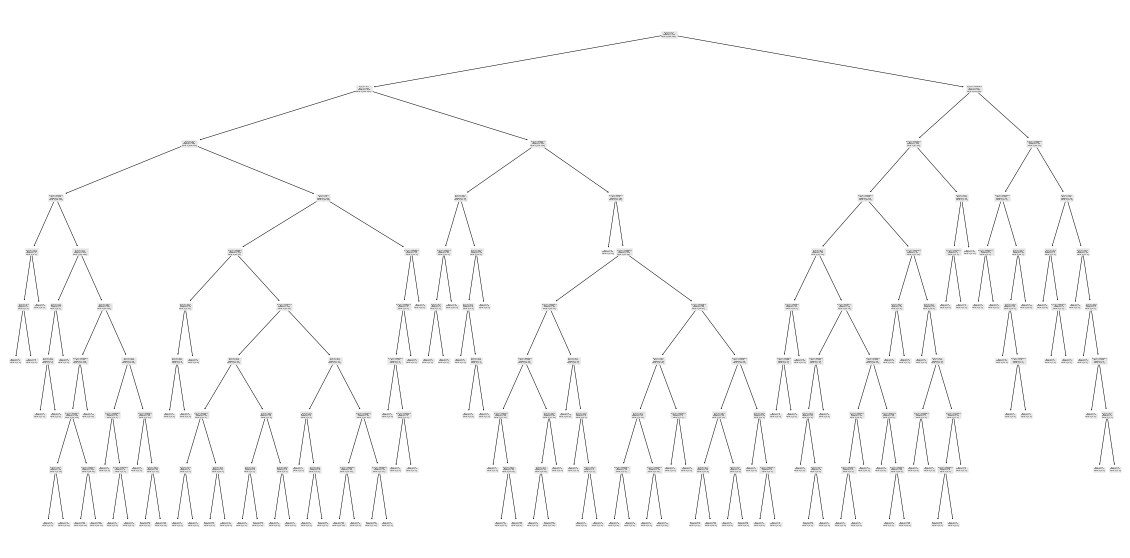

In [36]:
plt.figure(figsize=(20,10))
tree.plot_tree(model_final);

### 3.5 - Model Evaluation on trained data

In [37]:
y_train_pred = model_final.predict(x_train_res)
accuracy_train = accuracy_score(y_train_res, y_train_pred) 
print('Accuracy score for trained data: ', round(accuracy_train, 4))

Accuracy score for trained data:  0.8704


In [38]:
confusion_matrix(y_train_res, y_train_pred)

array([[308,  74],
       [ 25, 357]], dtype=int64)

In [39]:
print(classification_report(y_train_res, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       382
           1       0.83      0.93      0.88       382

    accuracy                           0.87       764
   macro avg       0.88      0.87      0.87       764
weighted avg       0.88      0.87      0.87       764



### 3.6 - Predicting model on test data

In [40]:
y_test_pred= model_final.predict(x_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print('Accuracy Score of Test data :', round(accuracy_test, 4))

Accuracy Score of Test data : 0.6083


In [41]:
confusion_matrix(y_test, y_test_pred)

array([[58, 36],
       [11, 15]], dtype=int64)

In [42]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.62      0.71        94
           1       0.29      0.58      0.39        26

    accuracy                           0.61       120
   macro avg       0.57      0.60      0.55       120
weighted avg       0.72      0.61      0.64       120



# 4 - Conclusion

### Since the accuracy of the Training set is 0.87% we test the accuracy on the test data which is 0.61%. SMOTE is giving me a great accuracy and recall, I’ll go ahead and use that model!

### As seen in the confusion matrix of Test data 73 instances are predicted correctly and 48 instances are not

### We can see below graph for how many persons are having taxable_income <= 30000 as "Risky" and others are "Good" from fraud data.

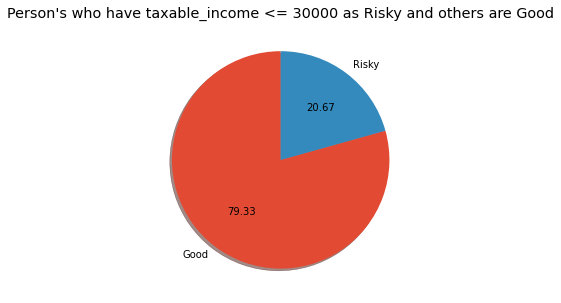

In [59]:
fig = plt.figure(figsize = (10, 5))
plt.title("Person's who have taxable_income <= 30000 as Risky and others are Good")
plt.pie(data['income'].value_counts(), labels= ['Good' , 'Risky'], 
        autopct='%0.2f', shadow=True, startangle=90)
plt.show()